In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train_sparse),(x_test,y_test_sparse)=fashion_mnist.load_data()
print(x_train.shape,x_test.shape)
from tensorflow.keras.utils import to_categorical, plot_model
y_train=to_categorical(y_train_sparse)
y_test=to_categorical(y_test_sparse)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(10000, 10)


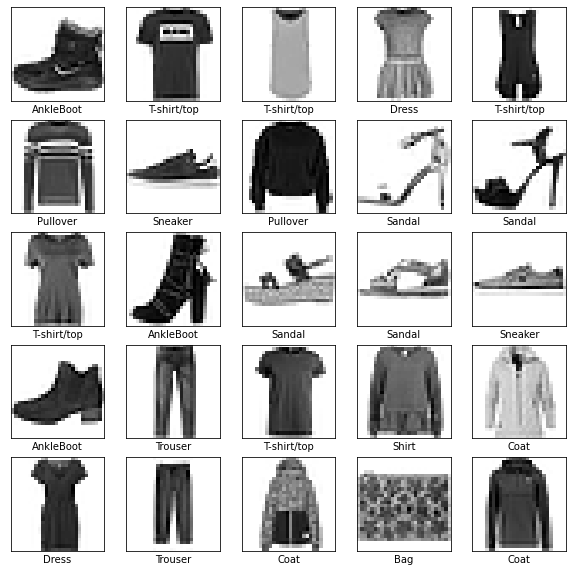

In [2]:
x_train=x_train/255.0
x_test=x_test/255.0

class_names=['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_sparse[i]])
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,LeakyReLU,PReLU
model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(256,activation='elu',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(LeakyReLU())
model.add(Dense(128,activation='selu',kernel_initializer='lecun_normal'))
model.add(PReLU())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 p_re_lu (PReLU)             (None, 128)               128       
                                                                 
 dense_2 (Dense)             (None, 10)                1

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,LeakyReLU,PReLU,BatchNormalization
model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(256,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization(momentum=0.9))
model.add(Dense(128,activation='selu',kernel_initializer='lecun_normal'))
model.add(BatchNormalization(center=False, scale=False))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              256       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)               

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])
results=model.fit(x_train,y_train, batch_size=32, epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.4713 - accuracy: 0.8301 - val_loss: 0.3587 - val_accuracy: 0.8693
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3640 - accuracy: 0.8678 - val_loss: 0.3390 - val_accuracy: 0.8773
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3260 - accuracy: 0.8806 - val_loss: 0.3422 - val_accuracy: 0.8770
Epoch 4/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2991 - accuracy: 0.8886 - val_loss: 0.3377 - val_accuracy: 0.8768
Epoch 5/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2797 - accuracy: 0.8954 - val_loss: 0.3461 - val_accuracy: 0.8788
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2674 - accuracy: 0.8995 - val_loss: 0.3238 - val_accuracy: 0.8823
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2490 - accuracy: 0.9074 - val_loss: 0.3170 - val_ac

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,LeakyReLU,PReLU,BatchNormalization,Dropout
model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dropout(0.1))
model.add(Dense(256,activation='elu',kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='selu',kernel_initializer='lecun_normal'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])
results=model.fit(x_train,y_train, batch_size=32, epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.6431 - accuracy: 0.7684 - val_loss: 0.4356 - val_accuracy: 0.8452
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4183 - accuracy: 0.8452 - val_loss: 0.3778 - val_accuracy: 0.8605
Epoch 3/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3747 - accuracy: 0.8628 - val_loss: 0.3598 - val_accuracy: 0.8613
Epoch 4/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3395 - accuracy: 0.8733 - val_loss: 0.3477 - val_accuracy: 0.8743
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3277 - accuracy: 0.8806 - val_loss: 0.3261 - val_accuracy: 0.8782
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3182 - accuracy: 0.8810 - val_loss: 0.3168 - val_accuracy: 0.8823
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2995 - accuracy: 0.8878 - val_loss: 0.3114 - val_accura